In [1]:

import math 
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")

C:\Users\diead\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' 

In [2]:
Google = web.DataReader("GOOG",data_source='yahoo', start="2012-01-01",end="2021-01-01")


In [3]:
Google.head(5)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380500.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749400.0,332.892242
2012-01-05,330.745300,326.889740,329.828735,328.274536,6590300.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405900.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688800.0,310.067780


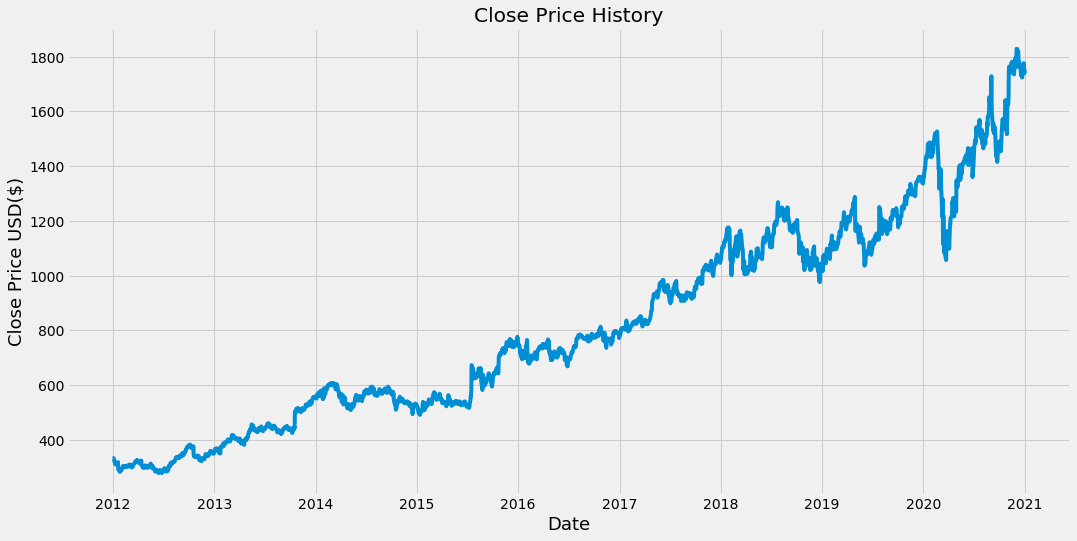

In [4]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(Google['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD($)",fontsize=18)
plt.show()

In [5]:

IBM

1812

In [6]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.03419239],
       [0.03511504],
       [0.03213494],
       ...,
       [0.9552955 ],
       [0.94290451],
       [0.95088122]])

In [7]:
#Create the training data set
#Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

#split the data 

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
     print(x_train)
     print(y_train)
     print()


[array([0.03419239, 0.03511504, 0.03213494, 0.02924485, 0.02038492,
       0.02060353, 0.02151009, 0.02269313, 0.02119826, 0.02235237,
       0.02374437, 0.02588542, 0.00866062, 0.00850952, 0.00703395,
       0.00335624, 0.00290938, 0.00672854, 0.00599236, 0.00677033,
       0.00700179, 0.00837772, 0.0119847 , 0.01608676, 0.01534093,
       0.0163311 , 0.01684866, 0.01506447, 0.01708656, 0.01630216,
       0.01495195, 0.01526057, 0.01465619, 0.01766521, 0.01571706,
       0.01512875, 0.01634717, 0.01615748, 0.0190765 , 0.0190315 ,
       0.02036564, 0.01999594, 0.01774559, 0.01475906, 0.01535058,
       0.01545989, 0.01324491, 0.01482013, 0.01888042, 0.01830497,
       0.01995736, 0.02121433, 0.02408835, 0.02393082, 0.02601721,
       0.0279686 , 0.02685628, 0.02902303, 0.02828043, 0.03109014])]
[0.02872726667553599]

[array([0.03419239, 0.03511504, 0.03213494, 0.02924485, 0.02038492,
       0.02060353, 0.02151009, 0.02269313, 0.02119826, 0.02235237,
       0.02374437, 0.02588542, 0.00

In [8]:

# Converting x_train and y_train to numpy arrays

x_train,y_train= np.array(x_train), np.array(y_train)

In [9]:
# Reshape the x_train set
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1752, 60, 1)

In [10]:

model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model

model.compile(optimizer='adam', loss="mean_squared_error")

In [12]:
# Train the model 

model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1752/1752 [==============================] - 102s 58ms/step - loss: 0.0011


In [13]:
# Creating the testing data set

# Creating a new array containing scaled values from index 1617 - 2096

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array
x_test =np.array(x_test)

In [15]:
#Reshape x_test
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(453, 60, 1)

In [16]:
# Get the models predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))

rmse

56.52643150068963

C:\Users\diead\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


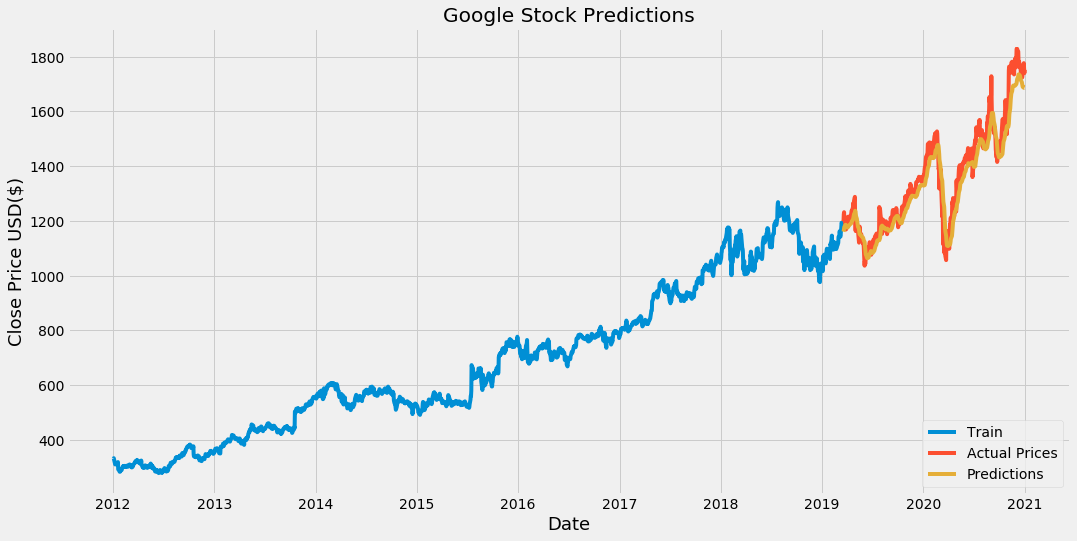

In [18]:
# Plotting the data

train = data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data

plt.figure(figsize =(16,8))
plt.title('Google Stock Predictions')
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Actual Prices','Predictions'],loc='lower right')
plt.show()